In [44]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mtplt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [45]:
movies = pd.read_csv("movies.csv",sep=",", encoding='latin1')
movies.head(5)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [46]:
movies.isna()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6818,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Histograme Moyenne Budget / Annee

(array([2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
        1., 1., 2., 1., 1., 1., 1., 1., 2.]),
 array([1986.        , 1987.15384615, 1988.30769231, 1989.46153846,
        1990.61538462, 1991.76923077, 1992.92307692, 1994.07692308,
        1995.23076923, 1996.38461538, 1997.53846154, 1998.69230769,
        1999.84615385, 2001.        , 2002.15384615, 2003.30769231,
        2004.46153846, 2005.61538462, 2006.76923077, 2007.92307692,
        2009.07692308, 2010.23076923, 2011.38461538, 2012.53846154,
        2013.69230769, 2014.84615385, 2016.        ]),
 <BarContainer object of 26 artists>)

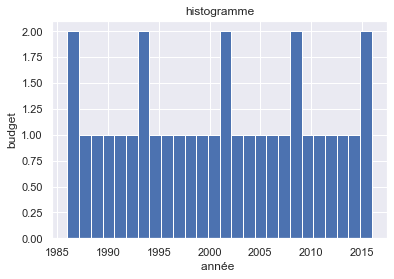

In [47]:
filmParAnnee = movies.groupby('year').mean()
filmParAnnee['year'] = movies['year'].unique()
mtplt.xlabel('année ')
mtplt.ylabel('budget')
mtplt.title('histogramme')
mtplt.hist(filmParAnnee['year'], bins=26)



Partie 1 : Diagramme de répartition

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


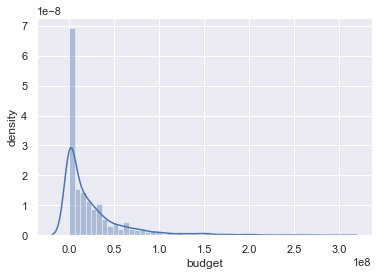

In [48]:
sb.set()
ax = sb.distplot(movies[['budget']],kde=True)
ax.set(xlabel='budget', ylabel='density')
mtplt.show()

Partie 1: Boite a moustache


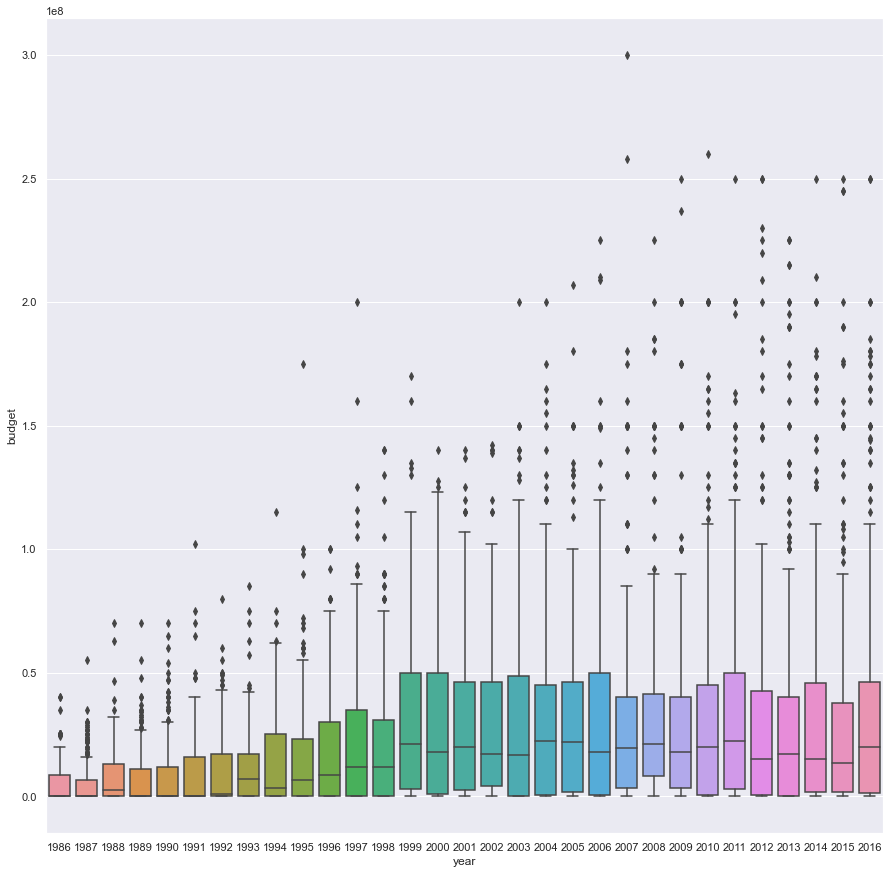

In [49]:
graph = mtplt.gcf()
graph.set_size_inches(15,15)
sb.boxplot(x='year',
           y='budget',
           data=movies)
mtplt.show()

Partie 1: heatmap

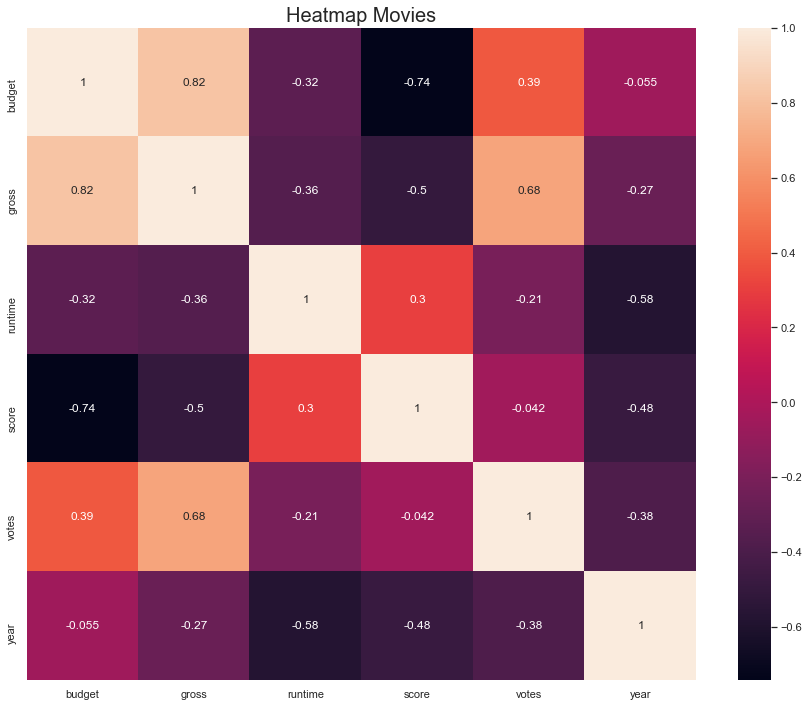

In [50]:
mtplt.figure(figsize=(15,12))
mtplt.title('Heatmap Movies', fontsize=20)
sb.heatmap(movies.corr().astype(float).corr(),vmax=1.0, annot=True)
mtplt.show()

Partie 2 : 1er algorithme (arbre de decision)


In [64]:
y = movies["budget"]
X = movies[["year","runtime"]]
test_size = 0.3
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

0.5071219103477168


Partie 2 2ème algorithme (Regréssion linéaire)

In [65]:
y = movies["budget"]
X = movies[["year","gross"]]
clf= LinearRegression()
test_size = 0.3
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)

0.5093462446148601

Partie 3 : Features Importance (regression Linéaire)

Feature: 0, Score: 674039.67024
Feature: 1, Score: 0.44057


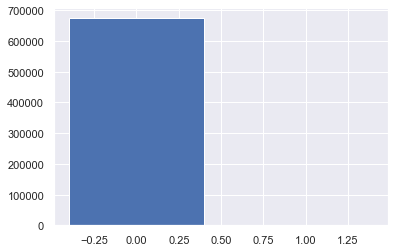

In [66]:
importances = clf.coef_
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
mtplt.bar([x for x in range(len(importances))], importances)
mtplt.show()

Partie 3: Features Importance(arbre de decision)

Feature: 0, Score: 0.38
Feature: 1, Score: 0.62


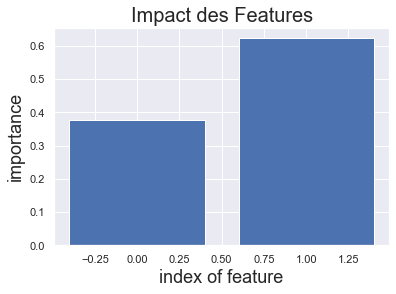

In [67]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
mtplt.title('Impact des Features', fontsize=20)
mtplt.ylabel('importance',fontsize = 18)
mtplt.xlabel("index of feature", fontsize = 18)
mtplt.bar([x for x in range(len(importance))], importance)
mtplt.show()